## Practice 3: Find out which person each tweet belongs to

There are three excel files with approx 7000 tweets from Elon Musk, Bill Gates and Ed Lee (former San Francisco major).
The goal is to build a model that finds the author of any of those

In [1]:
import numpy as np
import pandas as pd
import string
import re

import warnings
warnings.filterwarnings('ignore')

In [6]:
elondf=pd.read_excel("./data/Elon.xlsx")
bgatesdf=pd.read_excel("./data/BGates.xlsx") 
edleedf=pd.read_excel("./data/EdLee.xlsx") 

print('Number of tweets @elonmusk: ' + str(elondf.shape[0]))
print('Number of tweets @BillGates: ' + str(bgatesdf.shape[0]))
print('Number of tweets @mayorEdlee: ' + str(edleedf.shape[0]))

# Merge all tweets into a database
data = pd.concat([elondf, bgatesdf, edleedf], ignore_index=True)

# Selects only interesting columns
data = data[['screen_name', 'created_at', 'status_id', 'text']]
data.columns = ['author', 'date', 'id', 'text']

# Date parsing
data['date'] = pd.to_datetime(data['date'])
data.sample(15)

Number of tweets @elonmusk: 2678
Number of tweets @BillGates: 2087
Number of tweets @mayorEdlee: 2447


,author,date,id,text
4424,BillGates,2013-04-24 13:31:19+00:00,327052131033038784,Amazing day in Abu Dhabi w/global leaders who ...
4939,mayoredlee,2016-11-04 19:40:08+00:00,794625296871854080,Make sure your voice is heard this #ElectionDa...
2703,BillGates,2014-10-03 23:41:20+00:00,518184054961995776,“Avoiding excessive alarm is wise; avoiding ex...
4099,BillGates,2013-03-28 22:15:16+00:00,317399518230491072,PHOTOS: My trip to Ghana where I saw what is w...
6117,mayoredlee,2017-01-28 17:33:30+00:00,825396397193125760,恭賀新禧\nHappy #LunarNewYear https://t.co/qYbEs0sAIm
6824,mayoredlee,2017-07-27 19:03:40+00:00,890648902214401920,"With a new dedicated funding source, #SF is re..."
2139,elonmusk,2015-03-17 04:49:06+00:00,577693114657210368,Battery pack swap is active between SF and LA ...
1785,elonmusk,2016-04-02 19:30:17+00:00,716347036786757632,@Aakashhh_ we will send something to everyone ...
2449,elonmusk,2016-08-10 08:00:29+00:00,763283865238577152,Over the entrance of @OpenAI https://t.co/ca3Z...
1067,elonmusk,2013-09-07 20:17:19+00:00,376439054209781824,It is crazy that the proposed California high ...


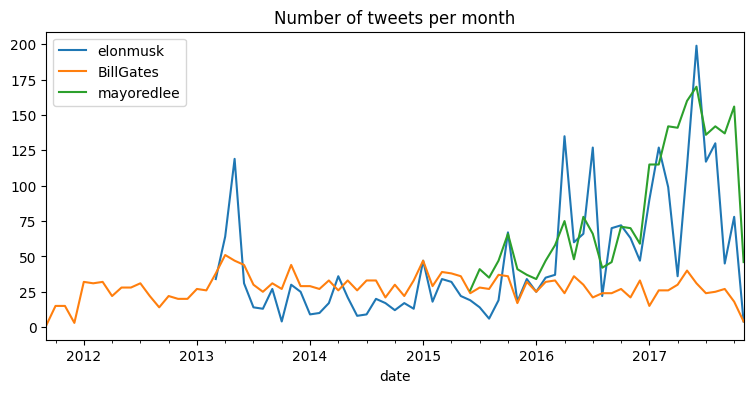

In [7]:
# Optional: temporary distribution of tweets

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,4))

for author in data.author.unique():
    df_temp = data[data['author'] == author].copy()
    df_temp['date'] = pd.to_datetime(df_temp['date'].dt.strftime('%Y-%m'))
    df_temp = df_temp.groupby(df_temp['date']).size()
    df_temp.plot(label=author, ax=ax)

ax.set_title('Number of tweets per month')
ax.legend();

In [8]:
# NLTK: Natural Language Toolkit
#!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SLO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# This function does some text cleaning. 
def cleantext(text):
    # lowercase
    new_text = text.lower()
    # Removal of web sites (starts with "http")
    new_text = re.sub('http\S+', ' ', new_text)
    # Number removal
    new_text = re.sub("\d+", ' ', new_text)
    # Multiple blank spaces removal
    new_text = re.sub("\\s+", ' ', new_text)
    
    return(new_text)

In [10]:
data['text'] = data.apply(lambda x: cleantext(x['text']), axis = 1)
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57+00:00,410447049687961600,sock monkey of destruction!
1,elonmusk,2017-07-20 16:45:38+00:00,888077452265771008,still a lot of work needed to receive formal a...
2,elonmusk,2013-07-15 14:06:18+00:00,356776740409974784,will publish hyperloop alpha design by aug . c...
3,elonmusk,2016-06-02 20:42:23+00:00,738470842695176320,recode interview with @karaswisher and @waltmo...
4,elonmusk,2016-06-17 00:37:36+00:00,743603466631733120,"as mentioned at the beginning of the year, i'm..."
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27+00:00,864965112326639616,rolling back #netneutrality will harm innovati...
7208,mayoredlee,2017-08-18 16:48:23+00:00,898587392189144960,#daca supports the million of children who've ...
7209,mayoredlee,2017-05-24 21:12:02+00:00,867488382846291840,"as expected, #ahca cbo scores leaves millions ..."
7210,mayoredlee,2015-07-21 21:34:01+00:00,623606881563455488,#sf leads in environmental stewardship &amp; w...


In [11]:
# Tokenize: create words from sentences, and removes punctuation
tokenizer = RegexpTokenizer(r'\w+') #w+ means one or more consecutive word characters
data['text'] = data.apply(lambda x: tokenizer.tokenize(x['text']), axis = 1)
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57+00:00,410447049687961600,"[sock, monkey, of, destruction]"
1,elonmusk,2017-07-20 16:45:38+00:00,888077452265771008,"[still, a, lot, of, work, needed, to, receive,..."
2,elonmusk,2013-07-15 14:06:18+00:00,356776740409974784,"[will, publish, hyperloop, alpha, design, by, ..."
3,elonmusk,2016-06-02 20:42:23+00:00,738470842695176320,"[recode, interview, with, karaswisher, and, wa..."
4,elonmusk,2016-06-17 00:37:36+00:00,743603466631733120,"[as, mentioned, at, the, beginning, of, the, y..."
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27+00:00,864965112326639616,"[rolling, back, netneutrality, will, harm, inn..."
7208,mayoredlee,2017-08-18 16:48:23+00:00,898587392189144960,"[daca, supports, the, million, of, children, w..."
7209,mayoredlee,2017-05-24 21:12:02+00:00,867488382846291840,"[as, expected, ahca, cbo, scores, leaves, mill..."
7210,mayoredlee,2015-07-21 21:34:01+00:00,623606881563455488,"[sf, leads, in, environmental, stewardship, am..."


In [12]:
# nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
print(stop)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [13]:
# Remove stop words
data['text'] = data['text'].apply(lambda x: [item for item in x if item not in stop])
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57+00:00,410447049687961600,"[sock, monkey, destruction]"
1,elonmusk,2017-07-20 16:45:38+00:00,888077452265771008,"[still, lot, work, needed, receive, formal, ap..."
2,elonmusk,2013-07-15 14:06:18+00:00,356776740409974784,"[publish, hyperloop, alpha, design, aug, criti..."
3,elonmusk,2016-06-02 20:42:23+00:00,738470842695176320,"[recode, interview, karaswisher, waltmossberg,..."
4,elonmusk,2016-06-17 00:37:36+00:00,743603466631733120,"[mentioned, beginning, year, expecting, succes..."
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27+00:00,864965112326639616,"[rolling, back, netneutrality, harm, innovatio..."
7208,mayoredlee,2017-08-18 16:48:23+00:00,898587392189144960,"[daca, supports, million, children, ever, know..."
7209,mayoredlee,2017-05-24 21:12:02+00:00,867488382846291840,"[expected, ahca, cbo, scores, leaves, millions..."
7210,mayoredlee,2015-07-21 21:34:01+00:00,623606881563455488,"[sf, leads, environmental, stewardship, amp, e..."


In [14]:
# Apply stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")
data['text'] = data['text'].apply(lambda x: [stemmer.stem(item) for item in x])
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57+00:00,410447049687961600,"[sock, monkey, destruct]"
1,elonmusk,2017-07-20 16:45:38+00:00,888077452265771008,"[still, lot, work, need, receiv, formal, appro..."
2,elonmusk,2013-07-15 14:06:18+00:00,356776740409974784,"[publish, hyperloop, alpha, design, aug, criti..."
3,elonmusk,2016-06-02 20:42:23+00:00,738470842695176320,"[recod, interview, karaswish, waltmossberg, vi..."
4,elonmusk,2016-06-17 00:37:36+00:00,743603466631733120,"[mention, begin, year, expect, success, rate, ..."
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27+00:00,864965112326639616,"[roll, back, netneutr, harm, innov, stifl, cre..."
7208,mayoredlee,2017-08-18 16:48:23+00:00,898587392189144960,"[daca, support, million, children, ever, known..."
7209,mayoredlee,2017-05-24 21:12:02+00:00,867488382846291840,"[expect, ahca, cbo, score, leav, million, unin..."
7210,mayoredlee,2015-07-21 21:34:01+00:00,623606881563455488,"[sf, lead, environment, stewardship, amp, even..."


Lemmatization

In [15]:
# !python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

In [16]:
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

data['text'] = data['text'].apply(lemmatize_tokens)
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57+00:00,410447049687961600,"[sock, monkey, destruct]"
1,elonmusk,2017-07-20 16:45:38+00:00,888077452265771008,"[still, lot, work, need, receiv, formal, appro..."
2,elonmusk,2013-07-15 14:06:18+00:00,356776740409974784,"[publish, hyperloop, alpha, design, aug, criti..."
3,elonmusk,2016-06-02 20:42:23+00:00,738470842695176320,"[recod, interview, karaswish, waltmossberg, vi..."
4,elonmusk,2016-06-17 00:37:36+00:00,743603466631733120,"[mention, begin, year, expect, success, rate, ..."
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27+00:00,864965112326639616,"[roll, back, netneutr, harm, innov, stifl, cre..."
7208,mayoredlee,2017-08-18 16:48:23+00:00,898587392189144960,"[daca, support, million, child, ever, know, we..."
7209,mayoredlee,2017-05-24 21:12:02+00:00,867488382846291840,"[expect, ahca, cbo, score, leav, million, unin..."
7210,mayoredlee,2015-07-21 21:34:01+00:00,623606881563455488,"[sf, lead, environment, stewardship, amp, even..."


In [17]:
data['date'] = data['date'].dt.tz_localize(None)
data.to_excel("Practice_cleaned.xlsx")

In [18]:
# Unify the strings once again
data['text'] = data['text'].apply(lambda x: ' '.join(x))
data

,author,date,id,text
0,elonmusk,2013-12-10 16:32:57,410447049687961600,sock monkey destruct
1,elonmusk,2017-07-20 16:45:38,888077452265771008,still lot work need receiv formal approv optim...
2,elonmusk,2013-07-15 14:06:18,356776740409974784,publish hyperloop alpha design aug critic feed...
3,elonmusk,2016-06-02 20:42:23,738470842695176320,recod interview karaswish waltmossberg via youtub
4,elonmusk,2016-06-17 00:37:36,743603466631733120,mention begin year expect success rate land ye...
...,...,...,...,...
7207,mayoredlee,2017-05-17 22:05:27,864965112326639616,roll back netneutr harm innov stifl creativ wi...
7208,mayoredlee,2017-08-18 16:48:23,898587392189144960,daca support million child ever know we home d...
7209,mayoredlee,2017-05-24 21:12:02,867488382846291840,expect ahca cbo score leav million uninsur amp...
7210,mayoredlee,2015-07-21 21:34:01,623606881563455488,sf lead environment stewardship amp even use r...


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

# Make split
x_train, x_test, y_train, y_test = train_test_split(
    data['text'], 
    data['author'], 
    test_size= 0.2
    )

print("Training data set size: ", len(x_train))
print("Testing data set size: ", len(x_test))

Training data set size:  5769
Testing data set size:  1443


In [20]:
# Create vectorizer
vectorizer = CountVectorizer(
    strip_accents = 'ascii', 
    lowercase = True
    )

# Fit vectorizer & transform it
vectorizer_fit = vectorizer.fit(x_train)
x_train_transformed = vectorizer_fit.transform(x_train)
x_test_transformed = vectorizer_fit.transform(x_test)

x_test_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12403 stored elements and shape (1443, 8021)>

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Train the model
naive_bayes = MultinomialNB()
naive_bayes_fit = naive_bayes.fit(x_train_transformed, y_train)

In [22]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

# Make predictions
train_predict = naive_bayes_fit.predict(x_train_transformed)
test_predict = naive_bayes_fit.predict(x_test_transformed)

def get_scores(y_real, predict):
  ba_train = balanced_accuracy_score(y_real, predict)
  return ba_train

train_scores = get_scores(y_train, train_predict)
test_scores = get_scores(y_test, test_predict)

In [23]:
print("Accuracy of Train set = {0:.2%}".format(train_scores))
print("Accuracy of Test set = {0:.2%}".format(test_scores))

Accuracy of Train set = 97.42%
Accuracy of Test set = 94.20%


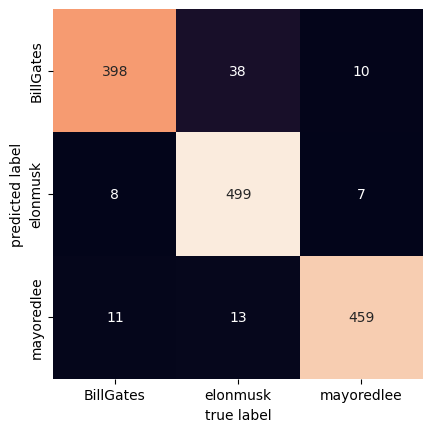

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=naive_bayes_fit.classes_, yticklabels=naive_bayes_fit.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');